In [6]:
# Questão 1

    # Importando preços diários da Petrobrás(PETR4.SA), Vale(VALE3.SA), Klabin(KLBN4.SA), Embraer(EMBR3.SA), Ambev(ABEV3.SA). 
    # Desde o dia 01/01/2017 até o dia de hoje(último fechamento).

from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

acoes_escolhidas = ['PETR4.SA', 'VALE3.SA', 'KLBN4.SA', 'EMBR3.SA', 'ABEV3.SA']

start = dt.datetime(2017, 1, 1)
end = dt.datetime(2022, 1, 1)

cotacoes = web.get_data_yahoo(acoes_escolhidas, start=start, end=end) # Importando as cotações
cotacoes_adj = cotacoes['Adj Close'] # Selecionando apenas os fechamentos ajustados
print('Preços de Fechamento Ajustados')
display(cotacoes_adj)    



    # O preço de fechamento de uma ação é o último preço em que ela foi negociada numa sessão. O de fechamento
    # ajustado levará em conta quaisquer distribuições de proventos e ações corporativas que ocorreram
    # em qualquer momento antes da abertura do dia seguinte. Ele possui vantagam em relação ao fechamento normal
    # pois o preço no ajustado oferece informações sobre o valor patrimonial da empresa, ou seja, vão além do
    # preço de mercado dela. São levados em conta no preço ajustado os eventos de desdobramento e grupamento
    # de ações, como também levam em conta os dividendos distribuidos e a oferta de direitos distribuídos.

Preços de Fechamento Ajustados


Symbols,PETR4.SA,VALE3.SA,KLBN4.SA,EMBR3.SA,ABEV3.SA
Date,,,,,
2017-01-02,7.383343,16.782001,2.231272,15.616085,13.968293
2017-01-03,7.806398,17.525337,2.287253,15.967443,14.250913
2017-01-04,7.806398,17.210592,2.255263,15.782008,14.139578
2017-01-05,7.932309,17.866869,2.287253,16.104088,14.216655
2017-01-06,7.886981,17.391403,2.255263,16.182171,14.096756
...,...,...,...,...,...
2021-12-23,18.922455,72.463844,4.698920,24.350000,15.550000
2021-12-27,19.202986,72.280739,4.746576,24.440001,15.530000
2021-12-28,19.223024,70.541252,4.708452,24.490000,15.520000


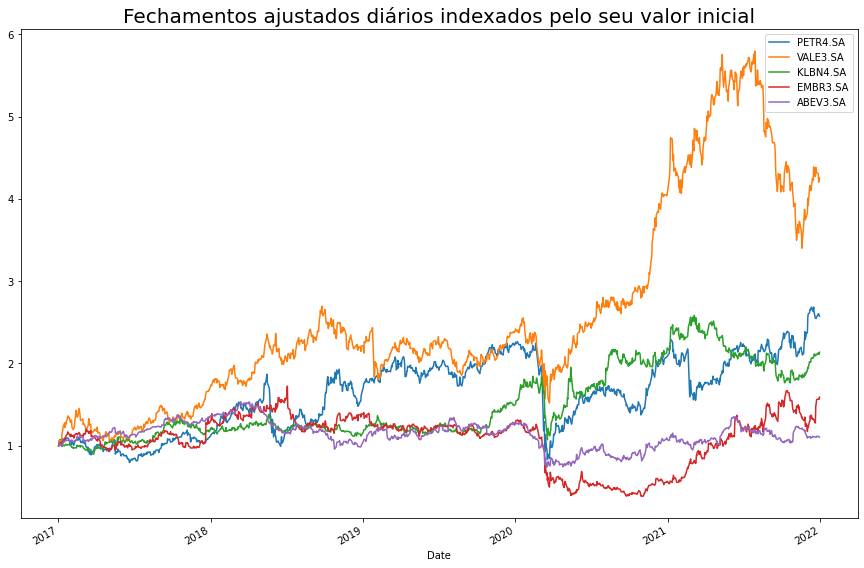

In [8]:
# Questão 2

    # Plotando os fechamentos ajustados desses ativos dividindo cada série pelo seu valor inicial 

for acao in acoes_escolhidas:
    cotacoes_adj_index = cotacoes_adj[f'{acao}']/cotacoes_adj[f'{acao}'].iloc[0]
    cotacoes_adj_index.plot(figsize=(15,10))
    plt.legend()
    plt.title('Fechamentos ajustados diários indexados pelo seu valor inicial', fontsize=20)
    

MM05


Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06    17.355241
                ...    
2021-12-23    72.667091
2021-12-27    72.626808
2021-12-28    72.401591
2021-12-29    71.835797
2021-12-30    71.476912
Name: VALE3.SA, Length: 1243, dtype: float64

MM20


Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04          NaN
2017-01-05          NaN
2017-01-06          NaN
                ...    
2021-12-23    69.249895
2021-12-27    69.721849
2021-12-28    70.067460
2021-12-29    70.401627
2021-12-30    70.755478
Name: VALE3.SA, Length: 1243, dtype: float64

Text(0.5, 1.0, 'Preços de fechamento ajustado da Vale, e suas médias móveis de 5 e 20 dias úteis')

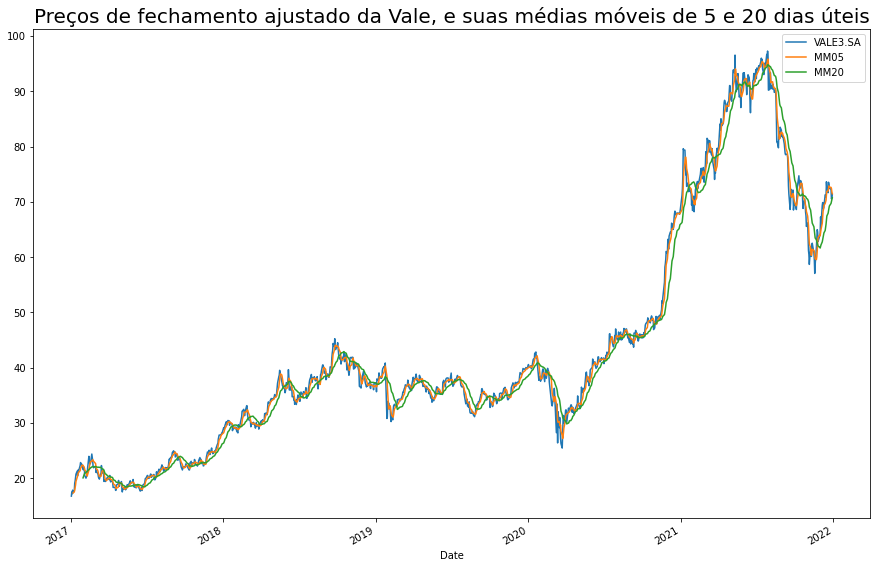

In [9]:
# Questão 3

    # construindo e plotando as médias móveis de 5 e 20 dias úteis para a VALE3

MM05 = cotacoes_adj['VALE3.SA'].rolling(5).mean() # MM de 5 dias
print('MM05')
display(MM05)

MM20 = cotacoes_adj['VALE3.SA'].rolling(20).mean() # MM de 20 dias
print('MM20')
display(MM20)

cotacoes_adj['VALE3.SA'].plot(figsize=(15,10)) # PLot
MM05.plot(label='MM05')
MM20.plot(label='MM20')
plt.legend()
plt.title('Preços de fechamento ajustado da Vale, e suas médias móveis de 5 e 20 dias úteis', fontsize=20)

Retorno simples das ações


Symbols,PETR4.SA,VALE3.SA,KLBN4.SA,EMBR3.SA,ABEV3.SA
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.057299,0.044294,0.025089,0.022500,0.020233
2017-01-04,0.000000,-0.017959,-0.013986,-0.011613,-0.007812
2017-01-05,0.016129,0.038132,0.014184,0.020408,0.005451
2017-01-06,-0.005714,-0.026612,-0.013986,0.004849,-0.008434
...,...,...,...,...,...
2021-12-23,0.006037,-0.009635,-0.002024,0.031780,0.010396
2021-12-27,0.014825,-0.002527,0.010142,0.003696,-0.001286
2021-12-28,0.001044,-0.024066,-0.008032,0.002046,-0.000644


Retorno logarítmo das ações


Symbols,PETR4.SA,VALE3.SA,KLBN4.SA,EMBR3.SA,ABEV3.SA
Date,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.055717,0.043341,0.024780,0.022250,0.020031
2017-01-04,0.000000,-0.018123,-0.014085,-0.011681,-0.007843
2017-01-05,0.016000,0.037423,0.014085,0.020203,0.005436
2017-01-06,-0.005731,-0.026972,-0.014085,0.004837,-0.008469
...,...,...,...,...,...
2021-12-23,0.006019,-0.009681,-0.002026,0.031285,0.010343
2021-12-27,0.014716,-0.002530,0.010091,0.003689,-0.001287
2021-12-28,0.001043,-0.024360,-0.008064,0.002044,-0.000644


Retornos simples anualizados


Symbols
PETR4.SA    0.309598
VALE3.SA    0.378465
KLBN4.SA    0.204053
EMBR3.SA    0.218774
ABEV3.SA    0.065278
dtype: float64

Retornos logarítmos anualizados


Symbols
PETR4.SA    0.191810
VALE3.SA    0.293722
KLBN4.SA    0.153972
EMBR3.SA    0.094013
ABEV3.SA    0.020062
dtype: float64

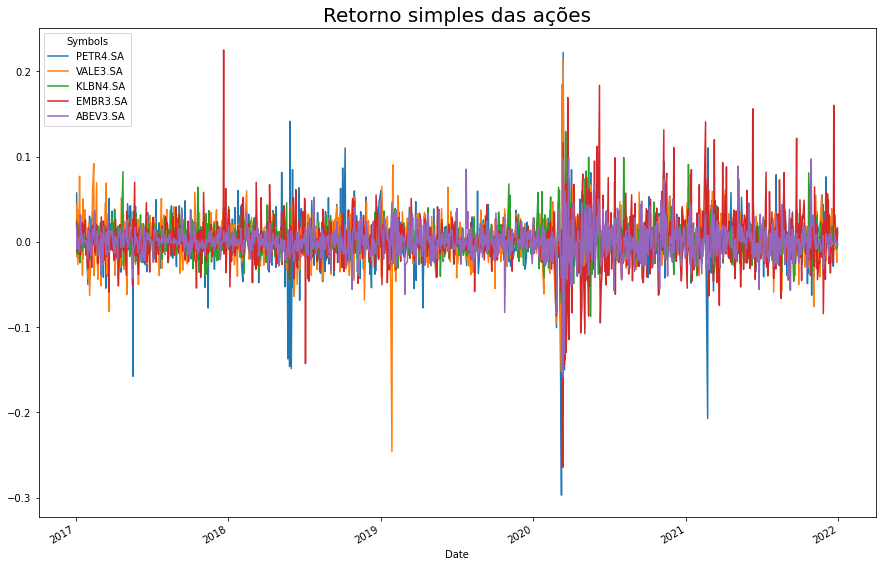

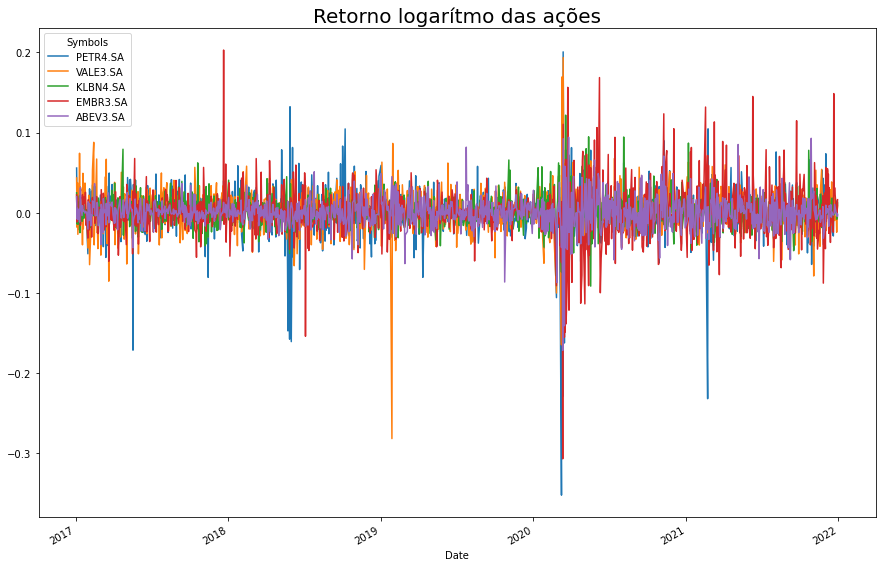

In [14]:
# Questão 4

    #Calculando o retorno simples e o retorno logarítmico 

import numpy as np

simpreturn = cotacoes_adj.pct_change() # Retorno simples
print('Retorno simples das ações')
display(simpreturn)
simpreturn.plot(figsize=(15,10)) # Plotando só de curiosidade
plt.title('Retorno simples das ações', fontsize=20)

logreturn = np.log(cotacoes_adj).diff() # Retorno logarítmo
print('Retorno logarítmo das ações')
display(logreturn)
logreturn.plot(figsize=(15,10)) # Plotando só de curiosidade
plt.title('Retorno logarítmo das ações', fontsize=20)

    # Transformando eles em retornos anualizados

simpreturn_anual = simpreturn.mean()*252 
print('Retornos simples anualizados')
display(simpreturn_anual)


logreturn_anual = logreturn.mean()*252
print('Retornos logarítmos anualizados')
display(logreturn_anual)

    # Podemos ver que os retornos simples e logarítmos não são iguais, porém, a grandeza de retorno entre os ativos não mudou.
    # Por exemplo, a ação da Vale foi a que teve maior retorno(tanto usando o simples quanto o logaritmo).

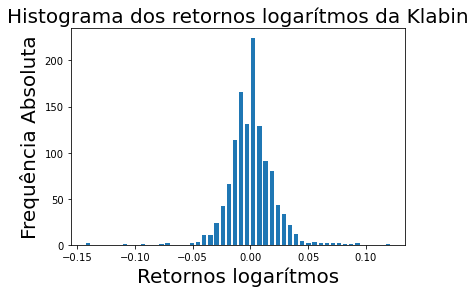

In [15]:
# Questão 5

    # Plotando o histograma de retornos logarítmos da ação da Klabin

plt.title('Histograma dos retornos logarítmos da Klabin', fontsize=20)
plt.xlabel('Retornos logarítmos', fontsize=20)
plt.ylabel('Frequência Absoluta', fontsize=20)
plt.hist(logreturn['KLBN4.SA'], 50, rwidth=0.7) 
plt.rcParams['figure.figsize'] = [10, 10] 
plt.show()

In [16]:
# Questão 6

    # Encontre a média e o desvio padrão anualizada dos log retornos de todos os ativos.

logreturn_mean_anual = logreturn.mean()*252
print('Médias dos log retornos anualizadas')
display(logreturn_mean_anual)

logreturn_std_anual = logreturn.std()*(252)**(1/2)
print('Desvios padrão dos log retornos anualizados')
display(logreturn_std_anual)

    # Comparando a performance das ações usando como base o Índice de Sharpe
    #(considerando a taxa SELIC atual de 0.1375 como a taxa livre de risco)

sharp_ratio = (logreturn_mean_anual - 0.1375)/logreturn_std_anual
print('Índice de Sharpe de cada ativo')
display(sharp_ratio)

    # Usando como base o Índice de Sharpe, temos que a Vale foi a que performou melhor, pois foi a que apresentou 
    # o maior retorno excessivo(retorno do ativo - taxa livree de risco) para uma unidade de volatilidade.


Médias dos log retornos anualizadas


Symbols
PETR4.SA    0.191810
VALE3.SA    0.293722
KLBN4.SA    0.153972
EMBR3.SA    0.094013
ABEV3.SA    0.020062
dtype: float64

Desvios padrão dos log retornos anualizados


Symbols
PETR4.SA    0.489990
VALE3.SA    0.412473
KLBN4.SA    0.316424
EMBR3.SA    0.499781
ABEV3.SA    0.301338
dtype: float64

Índice de Sharpe de cada ativo


Symbols
PETR4.SA    0.110839
VALE3.SA    0.378746
KLBN4.SA    0.052055
EMBR3.SA   -0.087013
ABEV3.SA   -0.389722
dtype: float64

In [17]:
# Questão 7

    # Escolhendo um peso para cada ativo(PETR4.SA = 20%, VALE3.SA = 60%, KLBN4.SA = 10%, EMBR3.SA = 7%, ABEV3.SA = 3%)
    
portfolio = 0.2*simpreturn['PETR4.SA'] + 0.6*simpreturn['VALE3.SA'] + 0.1*simpreturn['KLBN4.SA'] + 0.07*simpreturn['EMBR3.SA'] + 0.03*simpreturn['ABEV3.SA']
print('Retorno do portfolio')
display(portfolio)

    # Calculando a média e o desvio padrão

portfolio.describe()


Retorno do portfolio


Date
2017-01-02         NaN
2017-01-03    0.042727
2017-01-04   -0.013222
2017-01-05    0.029116
2017-01-06   -0.018422
                ...   
2021-12-23   -0.002239
2021-12-27    0.002683
2021-12-28   -0.014910
2021-12-29   -0.000446
2021-12-30    0.007187
Length: 1243, dtype: float64

count    1242.000000
mean        0.001296
std         0.020943
min        -0.163223
25%        -0.009194
50%         0.001199
75%         0.012390
max         0.185859
dtype: float64

In [18]:
# Questão 8

    # Transformando a série de retorno do portfólio em uma serie de retornos acumulados


port_acumulado_um = np.cumprod(1 + portfolio)
port_acumulado = port_acumulado_um - 1
display(port_acumulado)

    # PLotando em um mesmo gráfico
df = pd.concat([port_acumulado, cotacoes_adj])
display(df)
df.rename(columns = {'0':'Portfolio'})


Date
2017-01-02         NaN
2017-01-03    0.042727
2017-01-04    0.028940
2017-01-05    0.058899
2017-01-06    0.039392
                ...   
2021-12-23    2.820375
2021-12-27    2.830626
2021-12-28    2.773511
2021-12-29    2.771829
2021-12-30    2.798936
Length: 1243, dtype: float64

,0,PETR4.SA,VALE3.SA,KLBN4.SA,EMBR3.SA,ABEV3.SA
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.042727,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.028940,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.058899,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.039392,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-23,NaN,18.922455,72.463844,4.698920,24.350000,15.55
2021-12-27,NaN,19.202986,72.280739,4.746576,24.440001,15.53
2021-12-28,NaN,19.223024,70.541252,4.708452,24.490000,15.52


,0,PETR4.SA,VALE3.SA,KLBN4.SA,EMBR3.SA,ABEV3.SA
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,0.042727,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.028940,NaN,NaN,NaN,NaN,NaN
2017-01-05,0.058899,NaN,NaN,NaN,NaN,NaN
2017-01-06,0.039392,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-12-23,NaN,18.922455,72.463844,4.698920,24.350000,15.55
2021-12-27,NaN,19.202986,72.280739,4.746576,24.440001,15.53
2021-12-28,NaN,19.223024,70.541252,4.708452,24.490000,15.52
